In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.axis as ax

In [47]:
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

from vis.utils import utils
from keras.applications.vgg19 import VGG19, decode_predictions
from vis.visualization import visualize_cam, visualize_saliency

In [3]:
# Build the VGG19 network with ImageNet weights
model = VGG19(weights='imagenet', include_top=True)
print('Model loaded.')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Model loaded.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [55]:
# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'block4_pool' # 'block1_conv2', 'block2_conv2', 'block3_conv2'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

In [123]:
# Images corresponding to cat, and dog
image_paths = [
    "../../../backup/IMG_5037.JPG",
    "../../../backup/civilbuilding1F.jpg",
    "../../../backup/civilbuilding1FB.jpg"
]

c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


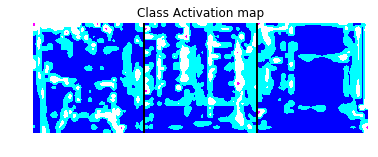

In [126]:
heatmaps = []
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(224, 224))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    pred_class = np.argmax(model.predict(x))
    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap=np.zeros((224,224,3))
    
    for i in range(5):
        heatmap += visualize_cam(model, layer_idx, i, seed_img)
    
    #heatmap = visualize_cam(model, layer_idx, 1, seed_img)
    heatmaps.append(heatmap)

plt.imshow(utils.stitch_images(heatmaps))
plt.axis('off')
plt.title('Class Activation map')
plt.savefig('keras-vis-cam-2.jpeg')